# Heart Disease Prediction – EDA & Logistic Regression


In this notebook, a heart disease dataset is explored and a Logistic Regression model is built.  
Steps include data cleaning, exploratory data analysis (EDA), feature scaling, model training, and evaluation using confusion matrix, classification report, and ROC-AUC.


# 1. Data Overview


In [121]:
 import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-attack-prediction/data.csv


# Short summary of dataset and target.

In [122]:
df = pd.read_csv("/kaggle/input/heart-attack-prediction/data.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [124]:
df.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [108]:
df.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

In [109]:

df["num       "].value_counts()


num       
0    188
1    106
Name: count, dtype: int64

In [110]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [111]:
print(df.columns.tolist())


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


# 2. Numeric cleaning  code

In [112]:
numeric_cols = ['age','sex','cp','trestbps','chol','fbs',
                'restecg','thalach','exang','oldpeak',
                'slope','ca','thal']


# Cleaning:

In [113]:
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [114]:
print("Target counts:\n", df['num'].value_counts())


Target counts:
 num
0    188
1    106
Name: count, dtype: int64


In [115]:
import numpy as np

# '?' ko NaN me convert
df = df.replace('?', np.nan)

# Numeric columns list (saare columns except 'num')
numeric_cols = df.columns.drop("num")

# Numeric type me convert
df[numeric_cols] = df[numeric_cols].astype(float)

# Missing values ko median se fill
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

print("df shape:", df.shape)
print("Target counts:\n", df["num"].value_counts())


df shape: (294, 14)
Target counts:
 num
0    188
1    106
Name: count, dtype: int64


In [116]:
df = df.replace('?', np.nan)
numeric_cols = df.columns.drop("num")
df[numeric_cols] = df[numeric_cols].astype(float)
...
print("Target counts:\n", df["num"].value_counts())


Target counts:
 num
0    188
1    106
Name: count, dtype: int64


# 3. Train / test split + scaling + model

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

X = df.drop(columns=["num"])
y = df["num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Confusion matrix:
 [[34  4]
 [ 6 15]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87        38
           1       0.79      0.71      0.75        21

    accuracy                           0.83        59
   macro avg       0.82      0.80      0.81        59
weighted avg       0.83      0.83      0.83        59

ROC-AUC: 0.8847117794486214


In [118]:
X = df.drop(columns=["num"])
y = df["num"]


# 4. EDA + visuals 

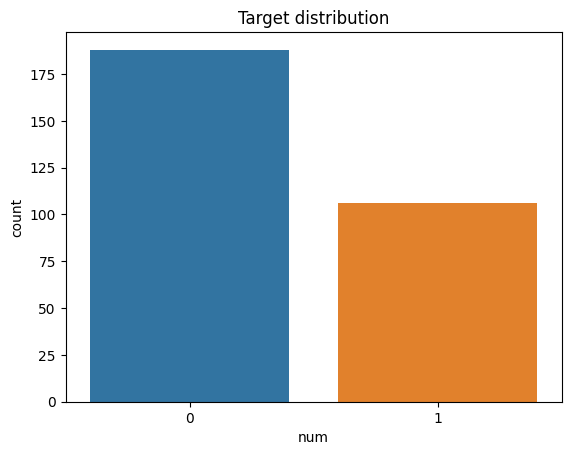

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


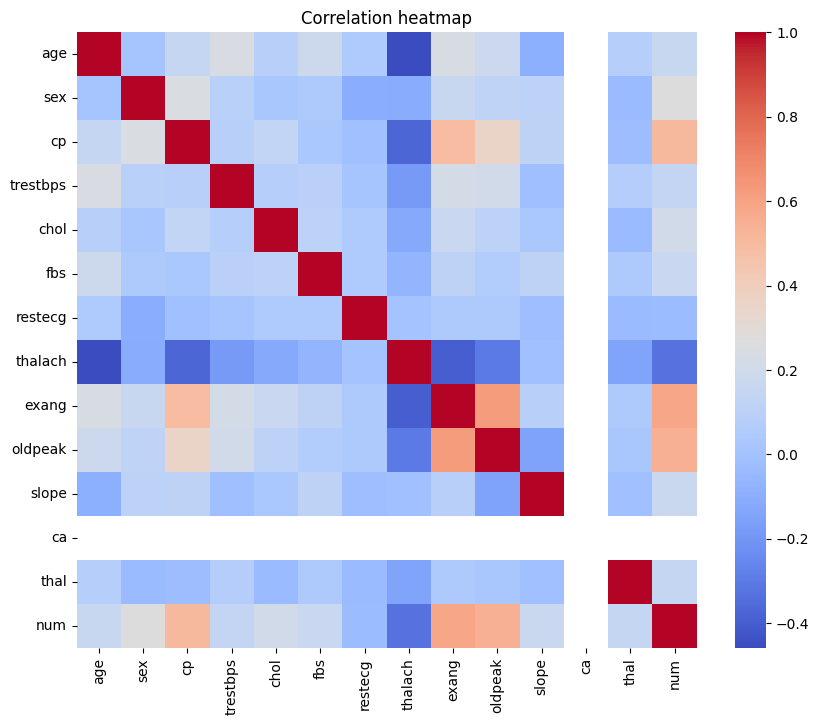

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target distribution
sns.countplot(x=y)
plt.title("Target distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation heatmap")
plt.show()


# 5. Confusion matrix plot 

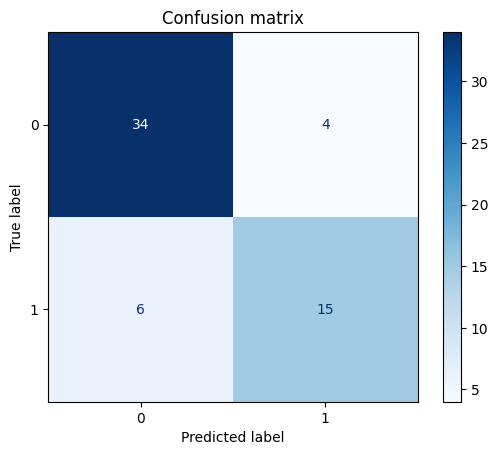

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion matrix")
plt.show()


# 6. Markdown explanation

## Data Overview
Short summary of dataset and target.

## Modeling
- Train–test split (80/20)
- StandardScaler
- Logistic Regression (max_iter=1000)

## Evaluation
- Confusion matrix
- Classification report (precision, recall, F1)
- ROC-AUC score
